In [47]:
import warnings
warnings.filterwarnings('ignore')
import helper
import jupyter_helper
import pandas as pd
import numpy as np

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor

In [3]:
s,e=jupyter_helper.get_start_end_date()
benchmark_code=jupyter_helper.get_benchmark_code()
stock_code='601398'
DAYS=5#计算时间段

In [17]:
data=helper._get_calc_data(stock_code,s,e)

In [21]:
from sklearn.model_selection import train_test_split

funcs={'DecisionTreeRegressor':DecisionTreeRegressor(),
       'LinearRegression':LinearRegression(),
       'SVR':SVR(),
       'KNeighborsRegressor':KNeighborsRegressor(),
       'RandomForestRegressor':RandomForestRegressor(),
       'AdaBoostRegressor':AdaBoostRegressor(),
       'GradientBoostingRegressor':GradientBoostingRegressor(),
       'BaggingRegressor':BaggingRegressor(),
       'ExtraTreeRegressor':ExtraTreeRegressor()
      }
X=data.iloc[:-100]
y=helper.create_validate_df_close(X,DAYS)
X = data[data.index.isin(y.index)]

test_size=0.2
random_state=10

# 拆分数据源
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=test_size,
                                                        random_state=random_state)

## Model 交叉验证法(Cross Validation)

In [29]:
from sklearn.model_selection import cross_val_score # K折交叉验证模块

cross_validation_report=[]

for k,v in funcs.items():
    print(k)
    v.fit(X_train, y_train)
    
    model_score=v.score(X_test, y_test)
    
    #使用K折交叉验证模块
    scores = cross_val_score(v, X, y, cv=30)
    
    #将5次的预测准确率打印出
    print(scores)
    # [ 0.96666667  1.          0.93333333  0.96666667  1.        ]

    #将5次的预测准确平均率打印出
    cross_score=scores.mean()
    # 0.973333333333
    print('-------------------')
    cross_validation_report.append([k,model_score,cross_score])
cross_validation_report_df=pd.DataFrame(cross_validation_report,columns=['name','model_score','cross_score'])

BaggingRegressor
[ 0.65256417  0.43655261  0.32521056  0.13997495  0.45973961 -0.69578412
  0.82779065  0.25096931  0.35985641 -0.04262816 -0.43923603 -0.09613778
  0.21986357 -0.14496218 -0.6287767   0.63436629 -0.6974315   0.29156739
 -1.0998146   0.32168997  0.68847028  0.25580617  0.09257797 -0.07478146
  0.68226867 -1.81102466 -0.45661247  0.69008237 -0.56574067 -0.24889244]
-------------------
AdaBoostRegressor
[ 0.4597386   0.4277612   0.40182098  0.26006956  0.29305135 -4.61334037
  0.77561228 -0.12151515  0.30362256 -5.75174481 -3.09460649 -0.00885426
 -4.04946817 -0.02000781 -8.39758324 -0.12054688 -0.19251772 -0.37698443
 -4.49943188 -2.70161886  0.73586004  0.16091293 -0.16603866  0.28209489
  0.63180409 -6.3884537   0.19720098  0.47900545 -1.02377112 -0.55558212]
-------------------
KNeighborsRegressor
[ 0.72640335  0.38217839  0.49771102  0.23467426  0.47549363 -0.20606942
  0.79612848  0.35898212  0.53854925 -0.33951361 -0.37778527 -0.11130406
  0.24934786 -0.02273177  0

## 交叉验证结果

In [30]:
cross_validation_report_df.sort_values('cross_score',ascending=False)

,name,model_score,cross_score
3,LinearRegression,0.976732,0.400772
5,SVR,0.979922,0.300108
6,GradientBoostingRegressor,0.979728,0.229106
2,KNeighborsRegressor,0.977161,0.190596
4,RandomForestRegressor,0.977081,0.041612
0,BaggingRegressor,0.977789,0.010918
8,DecisionTreeRegressor,0.958086,-0.694291
7,ExtraTreeRegressor,0.957314,-0.738785
1,AdaBoostRegressor,0.967058,-1.222450


## 使用平均方差(Mean squared error)会用于判断回归(Regression)模型的好坏

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [39]:
scoring_report=[]

scoring=['explained_variance',
        'neg_mean_absolute_error',
        'neg_mean_squared_error',
        'neg_mean_squared_log_error',
        'neg_median_absolute_error',
        'r2']


for k,v in funcs.items():
    for s in scoring:
        lost=-cross_val_score(v, X, y, cv=10, scoring=s)
        scoring_report.append([k,s,lost.mean()])

In [42]:
scoring_report_df=pd.DataFrame(scoring_report,columns=['name','scoring','value'])
scoring_report_df.sort_values('value')

,name,scoring,value
18,LinearRegression,explained_variance,-0.798957
23,LinearRegression,r2,-0.792934
36,GradientBoostingRegressor,explained_variance,-0.693679
12,KNeighborsRegressor,explained_variance,-0.658233
0,BaggingRegressor,explained_variance,-0.635660
24,RandomForestRegressor,explained_variance,-0.603601
30,SVR,explained_variance,-0.556732
48,DecisionTreeRegressor,explained_variance,-0.450632
41,GradientBoostingRegressor,r2,-0.382626
42,ExtraTreeRegressor,explained_variance,-0.351697


## Learning curve 检视过拟合

In [54]:
from sklearn.model_selection import learning_curve #学习曲线模块
import matplotlib.pyplot as plt #可视化模块

In [55]:
train_sizes, train_loss, test_loss = learning_curve(
    LinearRegression(), X, y, cv=10, scoring='neg_mean_squared_log_error')
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

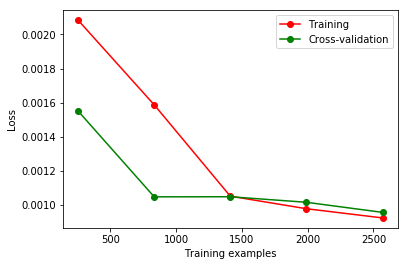

In [56]:
plt.plot(train_sizes, train_loss_mean, 'o-', color="r",
         label="Training")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g",
        label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

## validation_curve

In [58]:
from sklearn.model_selection import validation_curve #验证曲线模块

In [60]:
param_range = np.logspace(-6, -1, 5)

train_sizes, train_loss, test_loss = validation_curve(
    LinearRegression(), X, y, scoring='neg_mean_squared_log_error')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

TypeError: validation_curve() missing 2 required positional arguments: 'param_name' and 'param_range'